<a href="https://colab.research.google.com/github/arturcgs/BootcampDataScienceAplicada3/blob/main/Aulas/M%C3%B3dulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

In [2]:
#Importanto a base de dados

url = 'https://github.com/arturcgs/BootcampDataScienceAplicada3/raw/main/Bancos_de_Dados/dados_covid_sp.zip'

dados = pd.read_csv(url, sep=';')

dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [3]:
# Setando o tamanho dos gráficos

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15, 8)

In [4]:
#Arrumando o datetime

dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")


In [5]:
#Selecionando os dados de Mococa

dados_mococa = dados.loc[dados["nome_munic"] == "Mococa"]

dados_mococa.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
342,Mococa,3530508,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,0,8.0,"-21,4647","-47,0024",9
987,Mococa,3530508,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,0,8.0,"-21,4647","-47,0024",9
1632,Mococa,3530508,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,0,8.0,"-21,4647","-47,0024",9
2277,Mococa,3530508,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,0,8.0,"-21,4647","-47,0024",9
2922,Mococa,3530508,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,0,8.0,"-21,4647","-47,0024",9


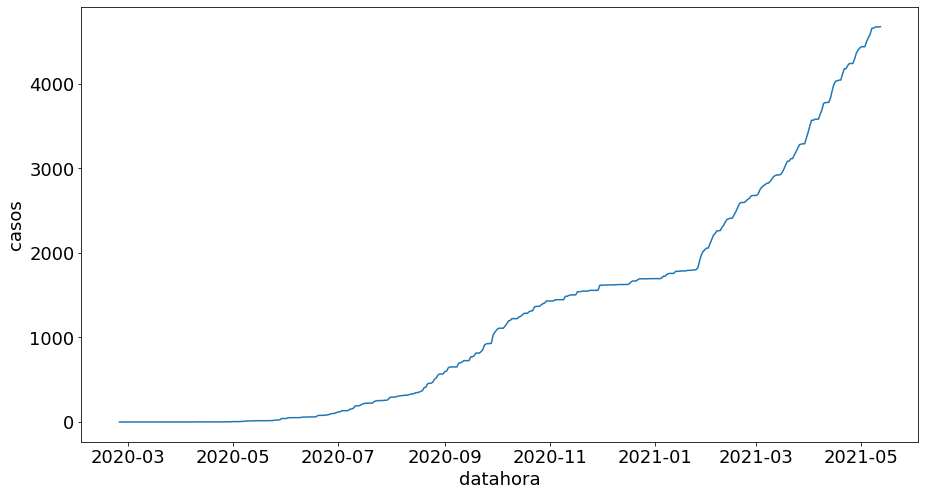

In [6]:
#Plotando gráfico de linha de casos acumulados de Mococa

sns.lineplot(x='datahora', y='casos', data=dados_mococa)

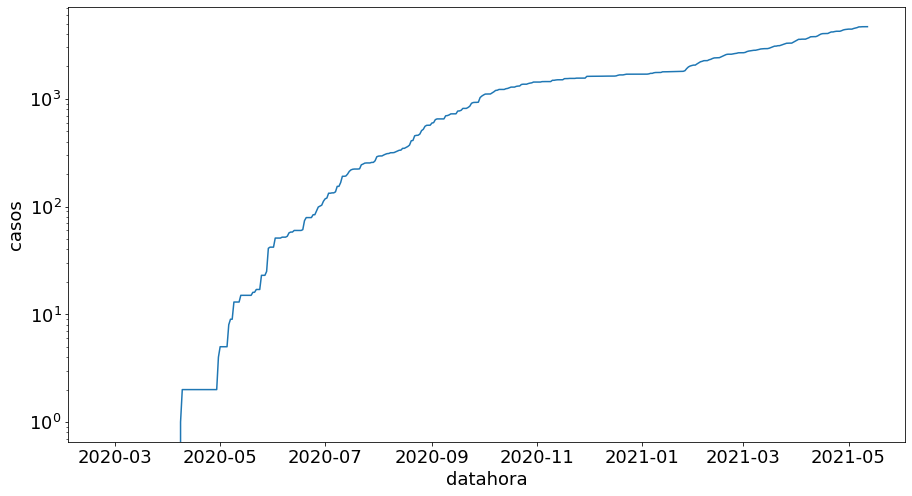

In [7]:
#Plotando gráfico log de casos acumulados de Mococa

sns.lineplot(x='datahora', y='casos', data=dados_mococa)
mpl.pyplot.yscale('log')


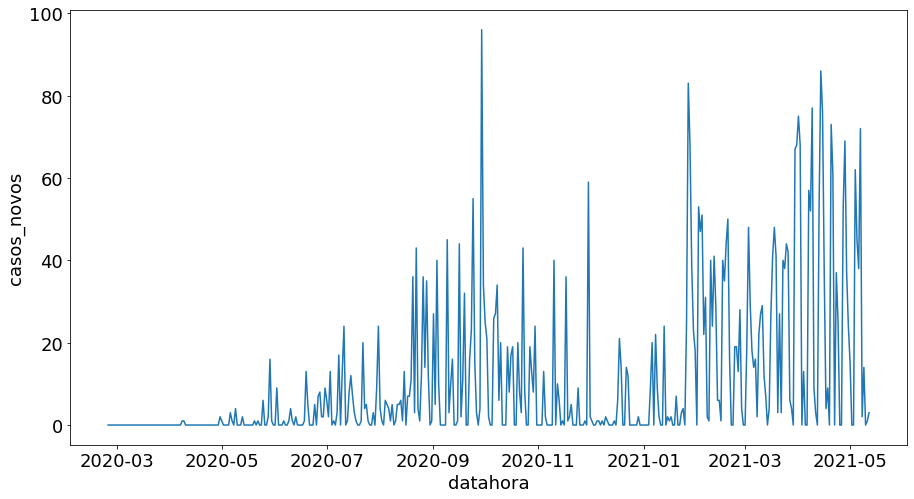

In [8]:
#Plotando o gráfico de casos novos de Mococa
sns.lineplot(x='datahora', y='casos_novos', data=dados_mococa)

In [9]:
#Ignorando warnings
import warnings; 
warnings.simplefilter('ignore')

#Fazendo a diferenciação dos dados de casos novos e óbitos novos

dados_mococa['taxa_crescimento_casos_novos'] = dados_mococa["casos_novos"].diff()
dados_mococa['taxa_crescimento_obitos_novos'] = dados_mococa["obitos_novos"].diff()

<BarContainer object of 443 artists>

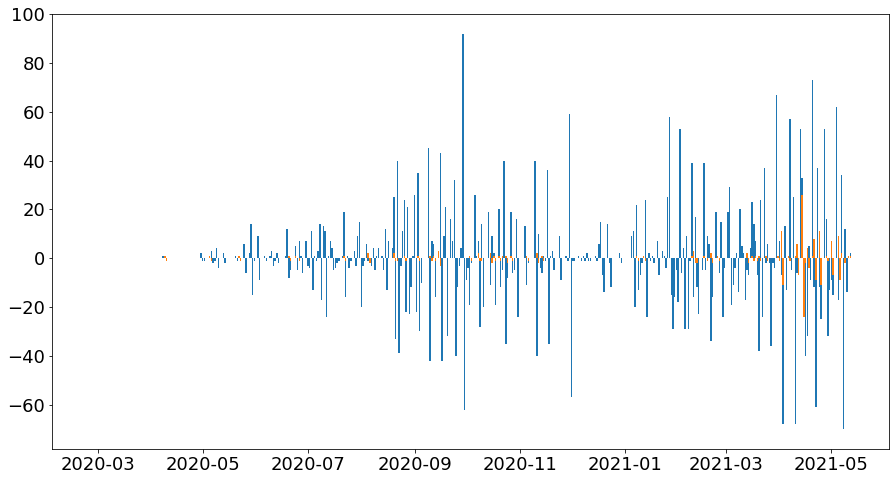

In [10]:
#Gráfico de taxa de crescimento dos casos e obitos novos de Mococa em barra

plt.bar(dados_mococa["datahora"], dados_mococa['taxa_crescimento_casos_novos'])
plt.bar(dados_mococa["datahora"], dados_mococa['taxa_crescimento_obitos_novos'])

(array([737485., 737516., 737546., 737577., 737607., 737638., 737669.,
        737699., 737730., 737760., 737791., 737822., 737850., 737881.,
        737911., 737942.]), <a list of 16 Text major ticklabel objects>)

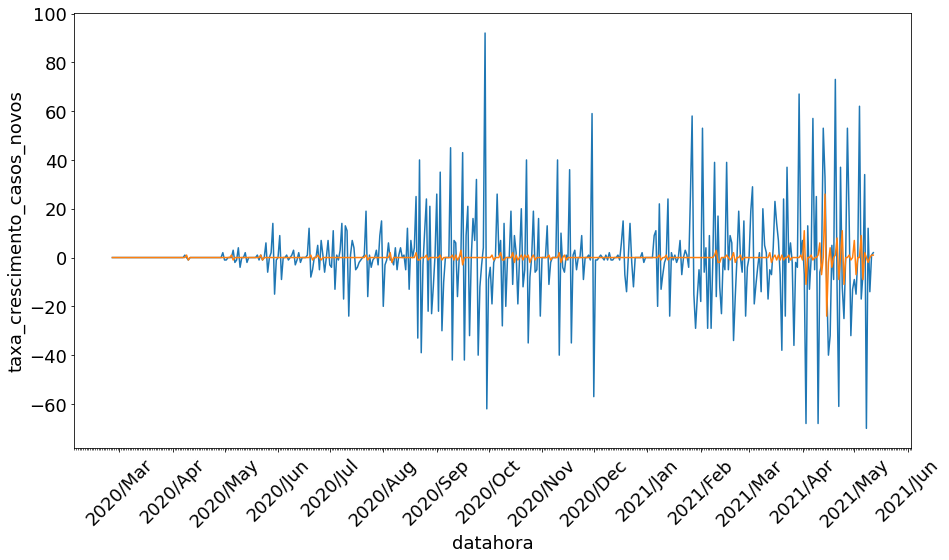

In [11]:
#Gráfico de taxa de crescimento dos casos e obitos novos de Mococa em linha

ax = sns.lineplot(x='datahora', y='taxa_crescimento_casos_novos', data=dados_mococa)
sns.lineplot(x='datahora', y='taxa_crescimento_obitos_novos', data=dados_mococa)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.xticks(rotation=45)

In [12]:
#Separando os dados só de 2021

dados_mococa["ano"] = pd.DatetimeIndex(dados_mococa['datahora']).year
dados_mococa_2021 = dados_mococa.query('ano == 2021')

dados_mococa_2021.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_crescimento_casos_novos,taxa_crescimento_obitos_novos,ano
200937,Mococa,3530508,1,1,2021-01-01,1695,0,"2,539212e+03","0,2857143",36,0,"5,393016e+01","0,0000000","0,0212389381",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,<5000,2.0,"-21,4647","-47,0024",53,0.0,0.0,2021
201582,Mococa,3530508,2,1,2021-01-02,1695,0,"2,539212e+03","0,2857143",36,0,"5,393016e+01","0,0000000","0,0212389381",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,<5000,2.0,"-21,4647","-47,0024",53,0.0,0.0,2021
202227,Mococa,3530508,3,1,2021-01-03,1695,0,"2,539212e+03","0,2857143",36,0,"5,393016e+01","0,0000000","0,0212389381",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,<5000,2.0,"-21,4647","-47,0024",1,0.0,0.0,2021
202872,Mococa,3530508,4,1,2021-01-04,1695,0,"2,539212e+03","0,2857143",36,0,"5,393016e+01","0,0000000","0,0212389381",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,<5000,2.0,"-21,4647","-47,0024",1,0.0,0.0,2021
203517,Mococa,3530508,5,1,2021-01-05,1704,9,"2,552694e+03","1,2857143",36,0,"5,393016e+01","0,0000000","0,0211267606",RA de Campinas,4,São João da Boa Vista,14,66753,12553,85516,<5000,2.0,"-21,4647","-47,0024",1,9.0,0.0,2021


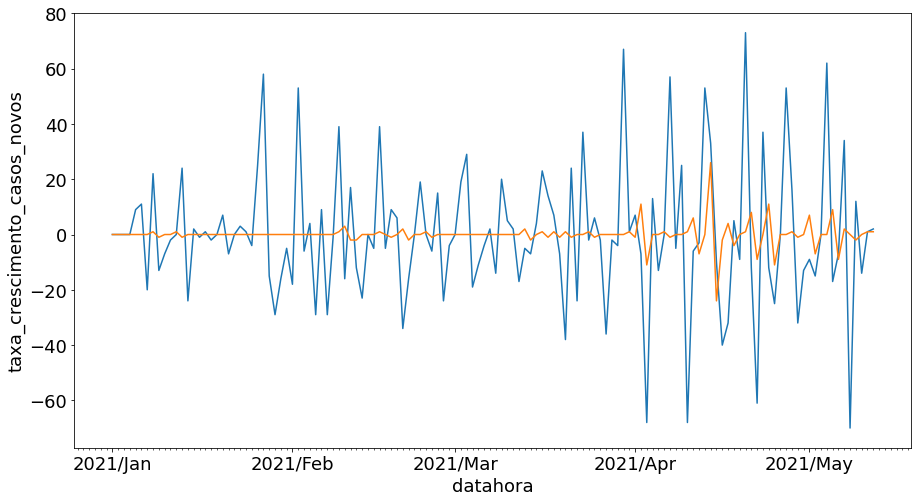

In [13]:
#Gráfico de taxa de crescimento dos casos e obitos novos de Mococa em linha em 2021

ax = sns.lineplot(x='datahora', y='taxa_crescimento_casos_novos', data=dados_mococa_2021)
sns.lineplot(x='datahora', y='taxa_crescimento_obitos_novos', data=dados_mococa_2021)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))

In [14]:
#Pegando a média móvel
dados_mococa_2021["media_movel_casos_novos"] = dados_mococa_2021["casos_novos"].rolling(window = 7, center = False).mean()
dados_mococa_2021["media_movel_obitos_novos"] = dados_mococa_2021["obitos_novos"].rolling(window = 7, center = False).mean()

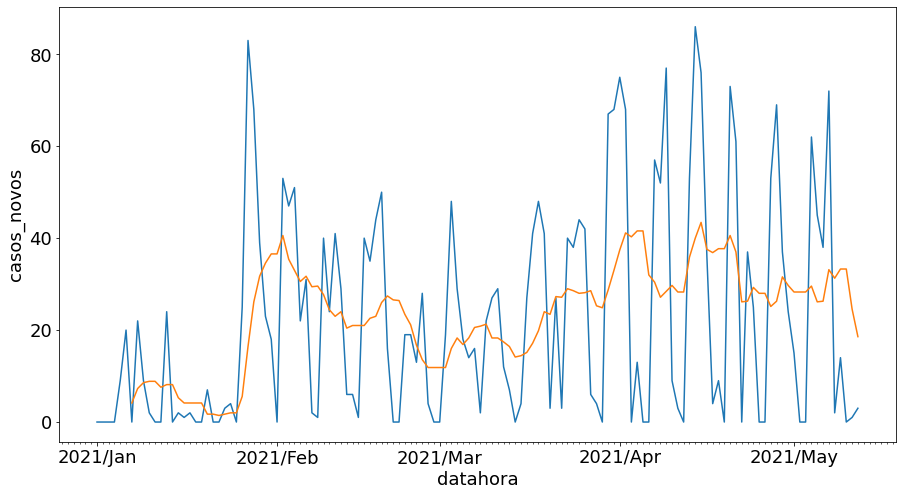

In [15]:
#Fazendo o gráfico da média móvel e comparando ela com o gráfico de casos novos

ax = sns.lineplot(x='datahora', y='casos_novos', data=dados_mococa_2021)
sns.lineplot(x='datahora', y='media_movel_casos_novos', data=dados_mococa_2021)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))

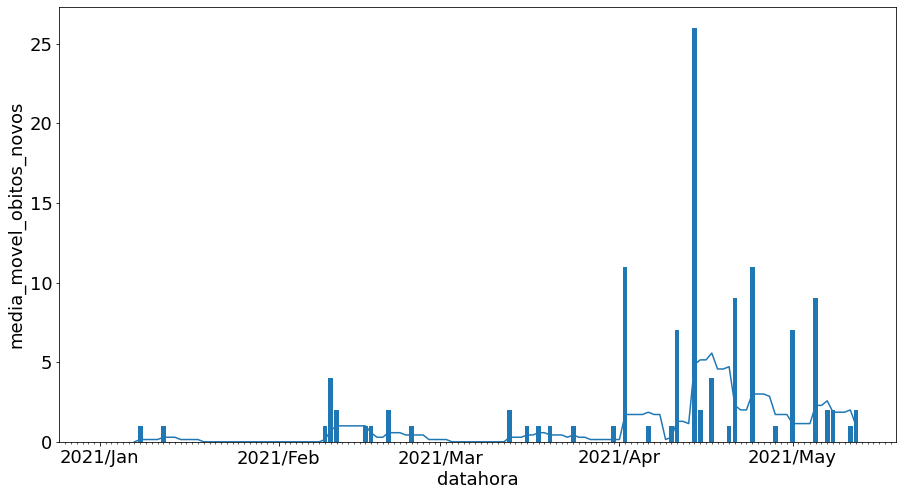

In [16]:
#Fazendo o gráfico da média móvel e comparando ela com o gráfico de obitos novos

plt.bar(dados_mococa_2021["datahora"], dados_mococa_2021['obitos_novos'])
ax = sns.lineplot(x='datahora', y='media_movel_obitos_novos', data=dados_mococa_2021)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))

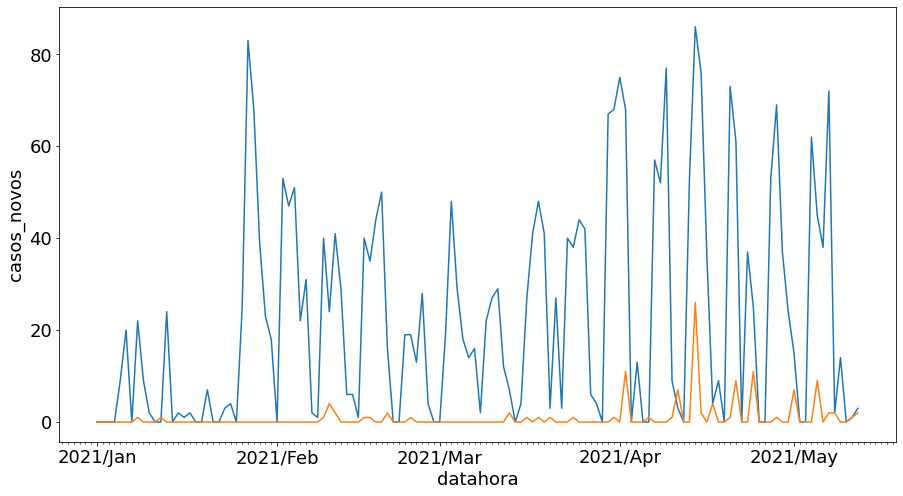

In [17]:
#Comparando novos casos com novos óbitos

ax = sns.lineplot(x='datahora', y='casos_novos', data=dados_mococa_2021)
sns.lineplot(x='datahora', y='obitos_novos', data=dados_mococa_2021)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))

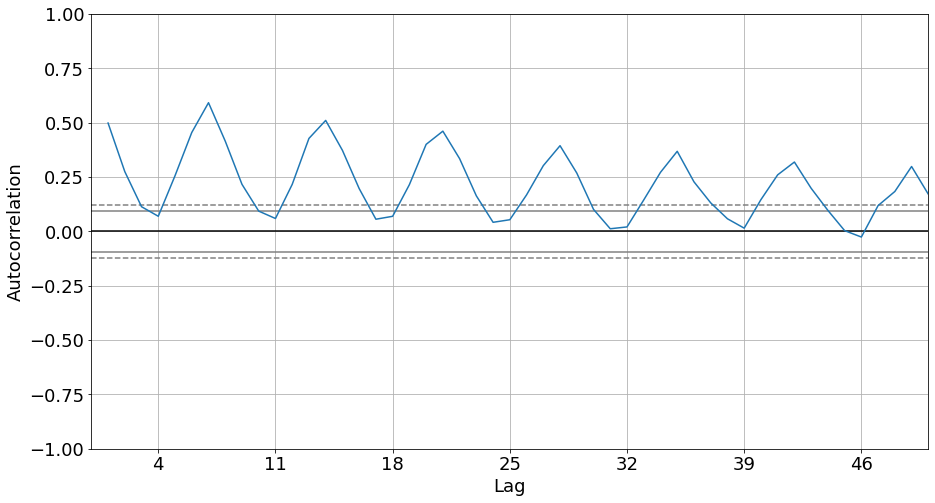

In [34]:
#Fazendo a autocorrelação de novos casos

ax = autocorrelation_plot(dados_mococa['casos_novos'])
plt.xlim(0, 50)

ax.xaxis.set_major_locator(ticker.IndexLocator(base = 7, offset = 3))

Aqui, dá pra ver como a correlação diminui a cada 7 dias. Com isso, dá pra ver q há uma sazonalidade de 7 dias nos dados, como esperado.

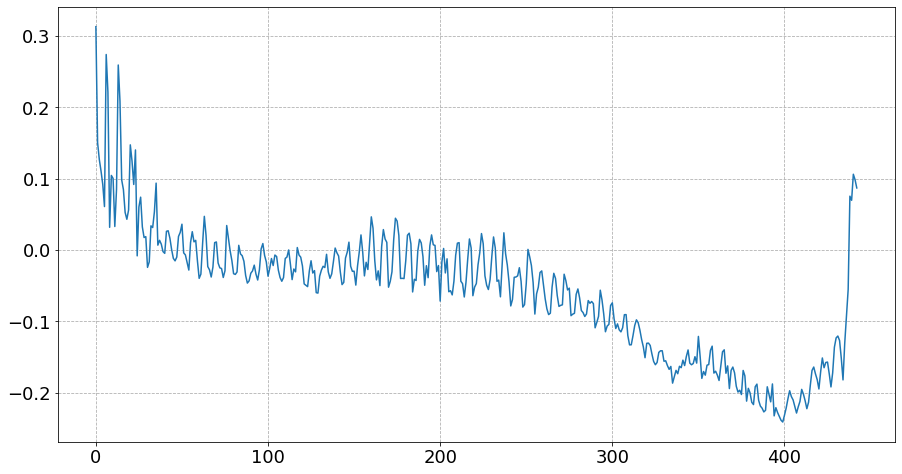

In [42]:
#Fazendo correlação cruzada entre casos novos e óbitos novos

correl_cruz = sm.tsa.stattools.ccf(dados_mococa['casos_novos'], dados_mococa['obitos_novos'])

plt.plot(correl_cruz)
plt.grid(linestyle='--')


(0.0, 50.0)

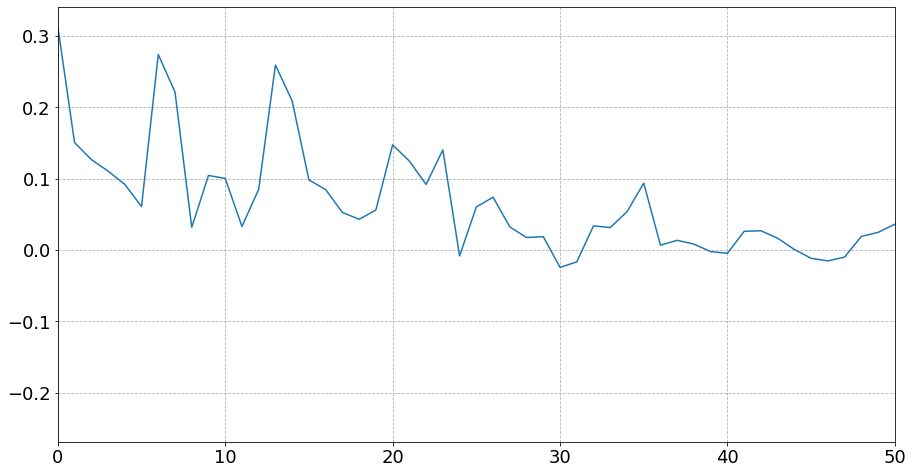

In [44]:
#Dando zoom na correlação cruzada entre casos novos e óbitos novos

correl_cruz = sm.tsa.stattools.ccf(dados_mococa['casos_novos'], dados_mococa['obitos_novos'])

plt.plot(correl_cruz) 
plt.grid(linestyle='--')


plt.xlim(0, 50)